In [6]:
#statsmodels
#pmdarima

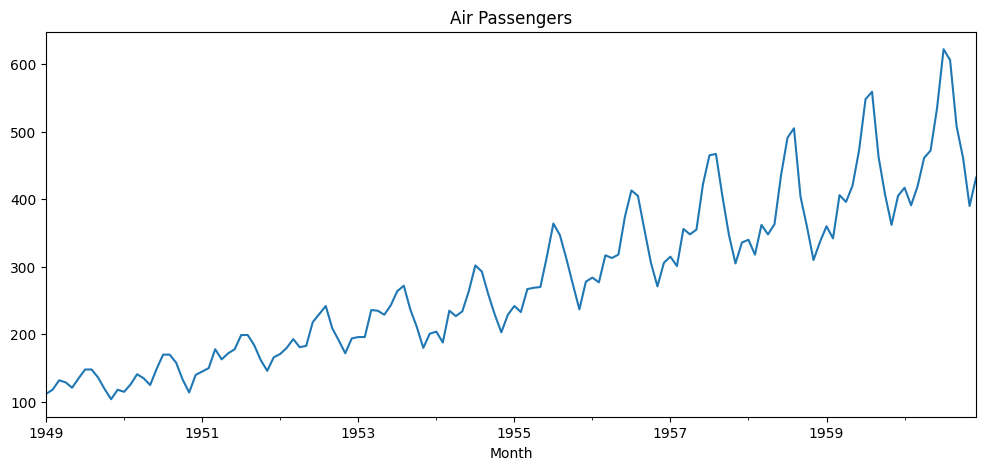

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

data1 = pd.read_csv('AirPassengers.csv')
data1['Month'] = pd.to_datetime(data1['Month'], format='%Y-%m')
data1.set_index('Month', inplace=True)


# Визуализация
data1['#Passengers'].plot(figsize=(12,5))
plt.title("Air Passengers")
plt.show()

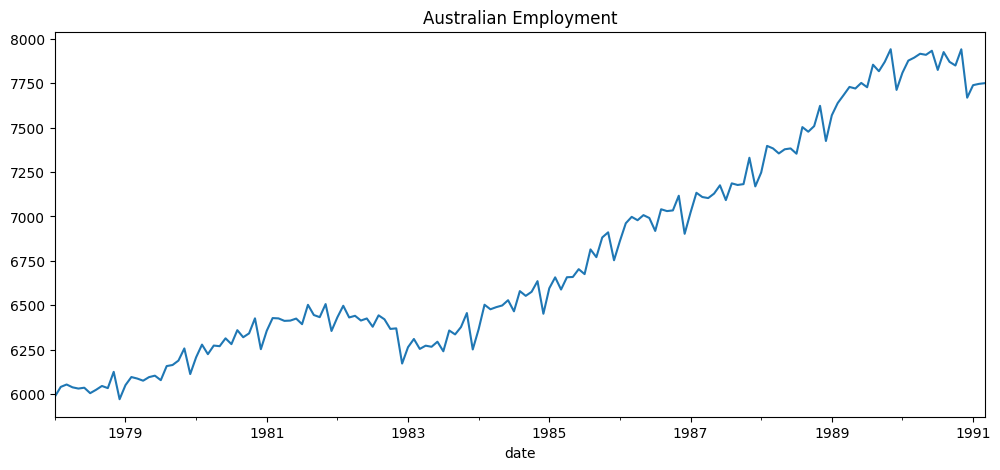

In [33]:
data2 = pd.read_csv('aus_employment.csv', parse_dates=['date'])
data2.set_index('date', inplace=True)


data2['people_employed'].plot(figsize=(12,5))
plt.title("Australian Employment")
plt.show()

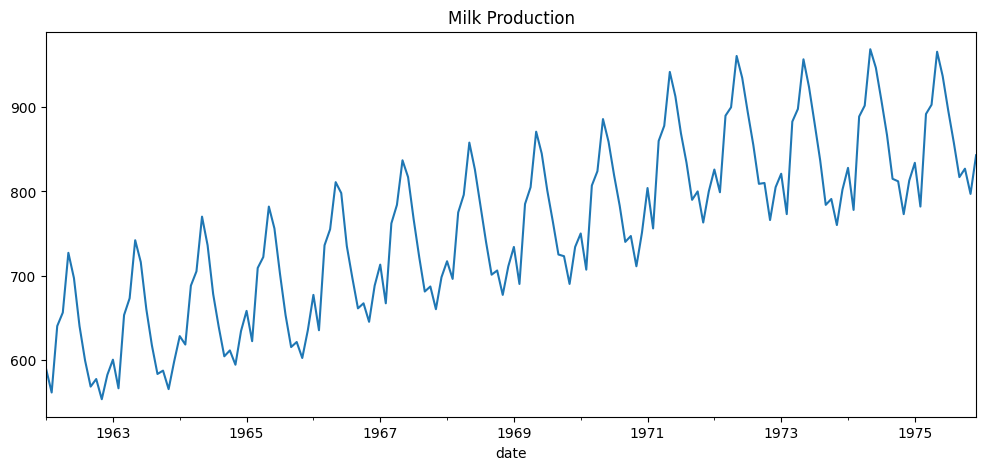

In [34]:
data3 = pd.read_csv('milk_production.csv', usecols=[1,2], names=['date', 'production'], header=0)
data3['date'] = pd.to_datetime(data3['date'])
data3.set_index('date', inplace=True)


data3['production'].plot(figsize=(12,5))
plt.title("Milk Production")
plt.show()

# Применение auto_arima для определения параметров SARIMA

In [35]:
# Определение параметров SARIMA
def get_sarima_params(data):
    return auto_arima(data, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

# Параметры для каждого набора данных
params1 = get_sarima_params(data1['#Passengers'])
params2 = get_sarima_params(data2['people_employed'])
params3 = get_sarima_params(data3['production'])

print("Air Passengers SARIMA Params: ", params1.order, params1.seasonal_order)
print("Australian Employment SARIMA Params: ", params2.order, params2.seasonal_order)
print("Milk Production SARIMA Params: ", params3.order, params3.seasonal_order)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=0.48 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.08 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=0.29 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=0.10 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=0.28 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.06 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.09 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=0.28 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=0.24 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=0.47 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.04 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.393, Time=0.03 sec
 ARIMA(3,1,1)(0,1,0

# Обучение модели SARIMA с найденными параметрами:

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Создание и обучение моделей на основе определенных параметров
model1 = SARIMAX(data1['#Passengers'], order=params1.order, seasonal_order=params1.seasonal_order).fit(disp=False)
model2 = SARIMAX(data2['people_employed'], order=params2.order, seasonal_order=params2.seasonal_order).fit(disp=False)
model3 = SARIMAX(data3['production'], order=params3.order, seasonal_order=params3.seasonal_order).fit(disp=False)


D:\data\innopolis\innopolis_labs_part2\lr17_ARIMA_SARIMA\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\data\innopolis\innopolis_labs_part2\lr17_ARIMA_SARIMA\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\data\innopolis\innopolis_labs_part2\lr17_ARIMA_SARIMA\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\data\innopolis\innopolis_labs_part2\lr17_ARIMA_SARIMA\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('N

In [38]:
import matplotlib.pyplot as plt

# Прогнозирование на 12 месяцев вперед для каждой модели:
forecast1 = model1.get_forecast(steps=12)
forecast2 = model2.get_forecast(steps=12)
forecast3 = model3.get_forecast(steps=12)


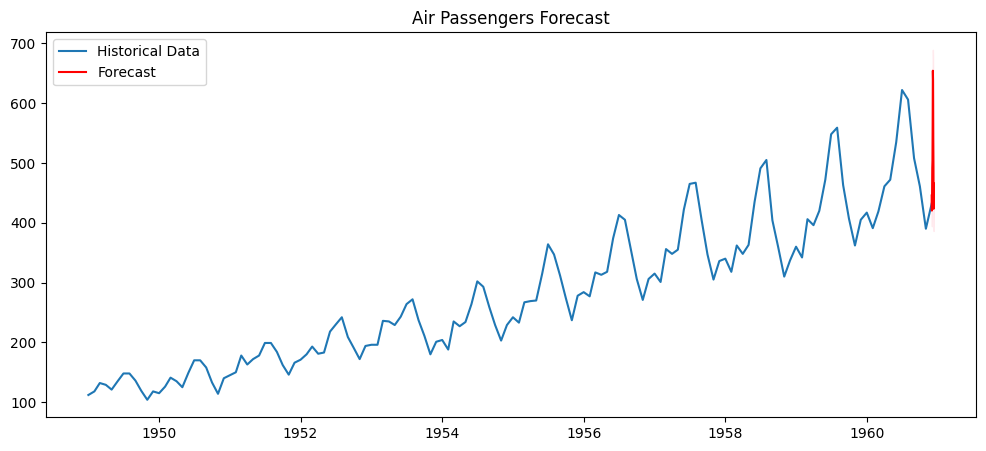

In [40]:
# Визуализация прогноза для Air Passengers
plt.figure(figsize=(12,5))
plt.plot(data1.index, data1['#Passengers'], label='Historical Data')
plt.plot(pd.date_range(data1.index[-1], periods=12), forecast1.predicted_mean, color='red', label='Forecast')
plt.fill_between(pd.date_range(data1.index[-1], periods=12), forecast1.conf_int().iloc[:, 0], forecast1.conf_int().iloc[:, 1], color='pink', alpha=0.3)
plt.title("Air Passengers Forecast")
plt.legend()
plt.show()

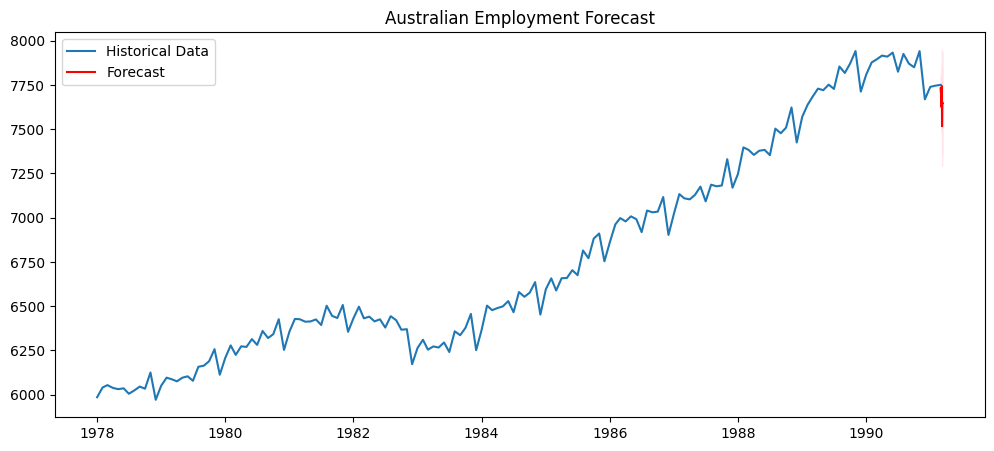

In [41]:
# Визуализация прогноза для Australian Employment
plt.figure(figsize=(12,5))
plt.plot(data2.index, data2['people_employed'], label='Historical Data')
plt.plot(pd.date_range(data2.index[-1], periods=12), forecast2.predicted_mean, color='red', label='Forecast')
plt.fill_between(pd.date_range(data2.index[-1], periods=12), forecast2.conf_int().iloc[:, 0], forecast2.conf_int().iloc[:, 1], color='pink', alpha=0.3)
plt.title("Australian Employment Forecast")
plt.legend()
plt.show()


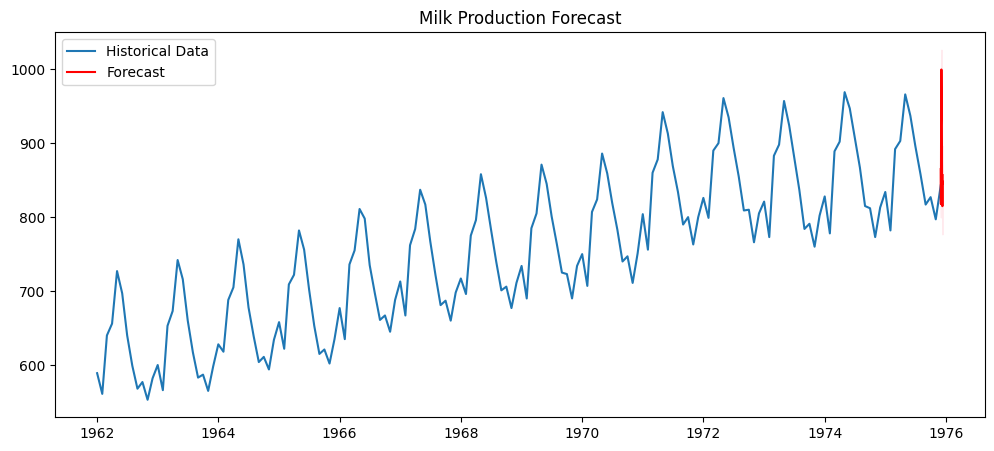

In [42]:
# Визуализация прогноза для Milk Production
plt.figure(figsize=(12,5))
plt.plot(data3.index, data3['production'], label='Historical Data')
plt.plot(pd.date_range(data3.index[-1], periods=12), forecast3.predicted_mean, color='red', label='Forecast')
plt.fill_between(pd.date_range(data3.index[-1], periods=12), forecast3.conf_int().iloc[:, 0], forecast3.conf_int().iloc[:, 1], color='pink', alpha=0.3)
plt.title("Milk Production Forecast")
plt.legend()
plt.show()